In [30]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
train = pd.read_csv('train.csv')
result = pd.read_csv('gender_submission.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
#dropping columns Cabin, Name, Ticket
train = train.drop('Cabin',1).drop('Ticket',1)
#train.head()

In [34]:
#Filling the NAN of age with average age of respective class using ('Mr','Mrs','Master','Miss') in the given candidates name
#Average Mr. Age is 32, 32
#Average Mrs. Age is 38.9, 36
#Average Master Age is 7.4,4.57
#Average Miss Age is 21.77 , 21.77
#Dr is 35
for i in range(train.shape[0]):
    if 'Master' in train['Name'][i] and np.isnan(train['Age'][i]):
        train.loc[i,'Age'] = 4 #should be based on the working of the model
        #test['Age'][i] = 7.5 
    elif 'Miss' in train['Name'][i] and np.isnan(train['Age'][i]):
        train.loc[i,'Age'] = 22 #should be based on the working of the model
    elif 'Mr.' in train['Name'][i] and np.isnan(train['Age'][i]):
        train.loc[i,'Age'] = 32 #should be based on the working of the model
    elif 'Mrs.' in train['Name'][i] and np.isnan(train['Age'][i]):
        train.loc[i,'Age'] = 36 #should be based on the working of the model
    elif 'Dr.' in train['Name'][i] and np.isnan(train['Age'][i]):
        train.loc[i,'Age'] = 35 #should be based on the working of the model    
            #test['Age'][i] = 18
#check for any nan in the dataset
print(sum(np.isnan(train['Age'])))

In [36]:
#merged = pd.merge(test,result,how = 'left',on = 'PassengerId')
train = train.drop('PassengerId',1)
train = train.drop('Name',1)
print(train.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


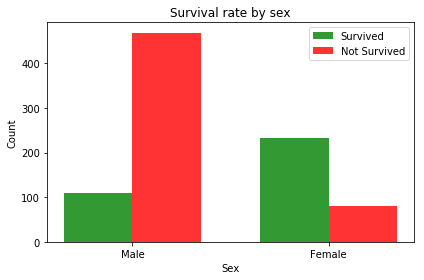

In [59]:
survived = (len(train[(train.Survived == 1) & (train.Sex == 'male')]),len(train[(train.Survived == 1) & (train.Sex == 'female')]))
not_survived = (len(train[(train.Survived == 0) & (train.Sex == 'male')]),len(train[(train.Survived == 0) & (train.Sex == 'female')]))
multiple_bars = plt.figure()

ax = plt.subplot(111)
index = np.arange(2)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, survived, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Survived')
 
rects2 = plt.bar(index + bar_width, not_survived, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Not Survived')    
    
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival rate by sex')
plt.xticks(index + bar_width /2 , ('Male', 'Female'))
plt.legend()
 
plt.tight_layout()
plt.show()

In [60]:
train.describe

<bound method NDFrame.describe of      Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0           0       3    male  22.0      1      0    7.2500        S
1           1       1  female  38.0      1      0   71.2833        C
2           1       3  female  26.0      0      0    7.9250        S
3           1       1  female  35.0      1      0   53.1000        S
4           0       3    male  35.0      0      0    8.0500        S
5           0       3    male  32.0      0      0    8.4583        Q
6           0       1    male  54.0      0      0   51.8625        S
7           0       3    male   2.0      3      1   21.0750        S
8           1       3  female  27.0      0      2   11.1333        S
9           1       2  female  14.0      1      0   30.0708        C
10          1       3  female   4.0      1      1   16.7000        S
11          1       1  female  58.0      0      0   26.5500        S
12          0       3    male  20.0      0      0    8.0500        S


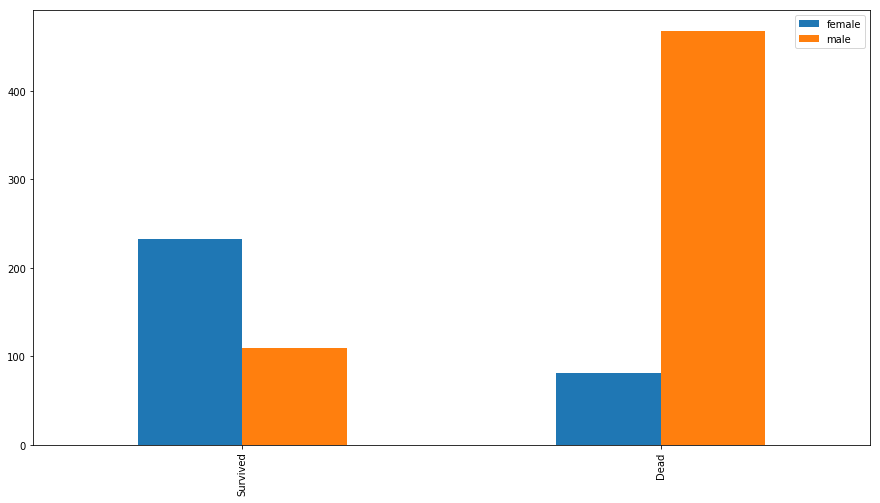

In [66]:
survived_sex = train[train['Survived']==1]['Sex'].value_counts()
dead_sex = train[train['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=False, figsize=(15,8))

In [8]:
train['Sex_Category'] = pd.Categorical(train.Sex).codes
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_Category
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


In [9]:
#remove column sex
train = train.drop('Sex',1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_Category
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [10]:
train['Embarked_Category'] = pd.Categorical(train.Embarked).codes
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_Category,Embarked_Category
0,0,3,22.0,1,0,7.2500,S,1,2
1,1,1,38.0,1,0,71.2833,C,0,0
2,1,3,26.0,0,0,7.9250,S,0,2
3,1,1,35.0,1,0,53.1000,S,0,2
4,0,3,35.0,0,0,8.0500,S,1,2


In [11]:
train = train.drop('Embarked',1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Category,Embarked_Category
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2


In [12]:
result_train = train['Survived']
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Category,Embarked_Category
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2


In [13]:
train = train.drop('Survived',1)
train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_Category,Embarked_Category
0,3,22.0,1,0,7.2500,1,2
1,1,38.0,1,0,71.2833,0,0
2,3,26.0,0,0,7.9250,0,2
3,1,35.0,1,0,53.1000,0,2
4,3,35.0,0,0,8.0500,1,2


In [185]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                         hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(train,result_train)
clf.score(train,result_train)

0.61616161616161613

In [190]:
clf = RandomForestClassifier()
clf.fit(train,result_train)
clf.score(train,result_train)

0.96071829405162734

In [187]:
clf = LogisticRegression()
clf.fit(train,result_train)
clf.score(train,result_train)

0.80134680134680136

In [188]:
clf = SVC()
clf.fit(train,result_train)
clf.score(train,result_train)

0.90684624017957349

In [189]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [191]:
#dropping columns Cabin, Name, Ticket
test = test.drop('Cabin',1).drop('Ticket',1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [192]:
test[0:1]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q


In [193]:
#finding mean values for Mr. , Mrs. ,  Dr. , Master. , Ms.
sum_Mr=sum_Mrs=sum_Dr=sum_Master=sum_Ms=0
age_Mr=age_Mrs=age_Dr=age_Master=age_Ms=0
for i in range(test.shape[0]):
    if 'Master.' in test['Name'][i] and not (np.isnan(test['Age'][i])):
        sum_Master += 1
        age_Master += test['Age'][i]
    elif 'Miss' in test['Name'][i] and not (np.isnan(test['Age'][i])):
        sum_Ms += 1
        age_Ms += test['Age'][i]
    elif 'Mr.' in test['Name'][i] and not (np.isnan(test['Age'][i])):
        sum_Mr += 1
        age_Mr += test['Age'][i]
    elif 'Mrs.' in test['Name'][i] and not (np.isnan(test['Age'][i])):
        sum_Mrs += 1
        age_Mrs += test['Age'][i]
    elif 'Dr.' in test['Name'][i] and not (np.isnan(test['Age'][i])):
        sum_Dr += 1
        age_Dr += test['Age'][i]

print("average ages")
print(sum_Master,sum_Ms,sum_Mr,sum_Mrs,sum_Dr)
print(age_Master/sum_Master,age_Ms/sum_Ms,age_Mr/sum_Mr,age_Mrs/sum_Mrs,age_Dr/sum_Dr)

average ages
17 64 183 62 1
7.40647058824 21.77484375 32.0 38.9032258065 53.0


In [194]:
print(test.shape)
print(sum_Master+sum_Ms+sum_Mr+sum_Mrs+sum_Dr)
print(sum(np.isnan(test['Age'])))

(418, 9)
327
86


In [195]:
#Random Forest seems to do the best job
#Pre-Processing testing data
for i in range(test.shape[0]):
    if 'Master' in test['Name'][i] and np.isnan(test['Age'][i]):
        test.loc[i,'Age'] = 7.5 #should be based on the working of the model
        #test['Age'][i] = 7.5 
    elif 'Miss' in test['Name'][i] and np.isnan(test['Age'][i]):
        test.loc[i,'Age'] = 22 #should be based on the working of the model
    elif 'Mr.' in test['Name'][i] and np.isnan(test['Age'][i]):
        test.loc[i,'Age'] = 32 #should be based on the working of the model
    elif 'Mrs.' in test['Name'][i] and np.isnan(test['Age'][i]):
        test.loc[i,'Age'] = 36 #should be based on the working of the model
    elif 'Dr.' in test['Name'][i] and np.isnan(test['Age'][i]):
        test.loc[i,'Age'] = 35 #should be based on the working of the model    
            #test['Age'][i] = 18
#check for any nan in the dataset
print(sum(np.isnan(test['Age'])))

1


In [196]:
print(test[np.isnan(test['Age'])])
print(sum(np.isnan(test['Age'])))
test['Age'][np.isnan(test['Age'])] = 22
print(test[np.isnan(test['Age'])])

    PassengerId  Pclass                     Name     Sex  Age  SibSp  Parch  \
88          980       3  O'Donoghue, Ms. Bridget  female  NaN      0      0   

    Fare Embarked  
88  7.75        Q  
1
Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Fare, Embarked]
Index: []


C:\Users\prana\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [197]:
# pd.where(np.isnan(test['Age']) == True)
#test.where(test['Age'])
print(test[(test.Age.isnull())])

Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Fare, Embarked]
Index: []


In [198]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [199]:
test = test.drop('PassengerId',1)
test = test.drop('Name',1)
print(test.head())

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  34.5      0      0   7.8292        Q
1       3  female  47.0      1      0   7.0000        S
2       2    male  62.0      0      0   9.6875        Q
3       3    male  27.0      0      0   8.6625        S
4       3  female  22.0      1      1  12.2875        S


In [200]:
#remove column sex
test['Sex_Category'] = pd.Categorical(test.Sex).codes
test = test.drop('Sex',1)
test['Embarked_Category'] = pd.Categorical(test.Embarked).codes
test = test.drop('Embarked',1)

In [201]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_Category,Embarked_Category
0,3,34.5,0,0,7.8292,1,1
1,3,47.0,1,0,7.0000,0,2
2,2,62.0,0,0,9.6875,1,1
3,3,27.0,0,0,8.6625,1,2
4,3,22.0,1,1,12.2875,0,2


In [202]:
result = result.drop('PassengerId',1)

In [203]:
result.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [204]:
print(test[np.isnan(test['Fare'])])
print(test['Fare'].describe())
test['Fare'][np.isnan(test['Fare'])] = 35

     Pclass   Age  SibSp  Parch  Fare  Sex_Category  Embarked_Category
152       3  60.5      0      0   NaN             1                  2
count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64


C:\Users\prana\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [205]:
print(test[np.isnan(test['Fare'])])

Empty DataFrame
Columns: [Pclass, Age, SibSp, Parch, Fare, Sex_Category, Embarked_Category]
Index: []


In [206]:
pd.DataFrame(clf.predict(test)).to_csv('submission.csv')